# Analyse Exploratoire des Données (EDA) pour la Prédiction du Temps d'Écoute des Podcasts

## 1. Importation des bibliothèques nécessaires

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [ ]:
# Ajouter le chemin du projet pour importer les modules
sys.path.append('/workspaces/Kaggle-Podcast-Listening-Time-dashboard/')
from src.data_preprocessing import load_data, feature_engineering

In [18]:
# Configuration de l'affichage
%matplotlib inline
#plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

## 2. Chargement des données

In [19]:
# Chemin vers les données
train_data_path = '../data/train.csv'
test_data_path = '../data/test.csv'

# Chargement des données
train_df = load_data(train_data_path)
test_df = load_data(test_data_path)

print(f"Dimensions des données d'entraînement: {train_df.shape}")
print(f"Dimensions des données de test: {test_df.shape}")


Dimensions des données d'entraînement: (750000, 12)
Dimensions des données de test: (250000, 11)


## 3. Aperçu des données

In [20]:
# Afficher les premières lignes des données d'entraînement
print("Premières lignes des données d'entraînement:")
train_df.head()

# Informations sur les types de données
print("\nTypes de données et valeurs non nulles:")
train_df.info()

# Statistiques descriptives
print("\nStatistiques descriptives:")
train_df.describe()

Premières lignes des données d'entraînement:

Types de données et valeurs non nulles:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       75

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


## 4. Analyse des valeurs manquantes

Nombre de valeurs manquantes par colonne:
id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

Pourcentage de valeurs manquantes:
id                              0.000000
Podcast_Name                    0.000000
Episode_Title                   0.000000
Episode_Length_minutes         11.612400
Genre                           0.000000
Host_Popularity_percentage      0.000000
Publication_Day                 0.000000
Publication_Time                0.000000
Guest_Popularity_percentage    19.470667
Number_of_Ads                   0.000133
Episode_Sentiment               0.000000
Li

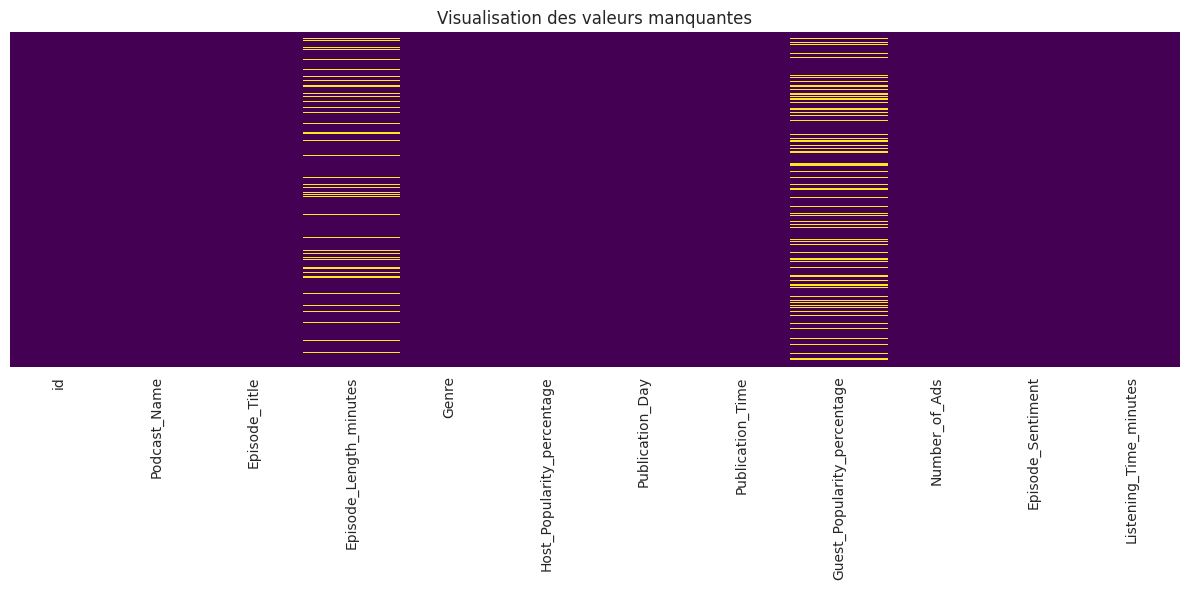

In [21]:
# Vérifier les valeurs manquantes
print("Nombre de valeurs manquantes par colonne:")
missing_values = train_df.isnull().sum()
print(missing_values)
print(f"\nPourcentage de valeurs manquantes:")
print(missing_values / len(train_df) * 100)

# Visualiser les valeurs manquantes
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Visualisation des valeurs manquantes')
plt.tight_layout()
plt.show()

## 5. Distribution de la variable cible (temps d'écoute)

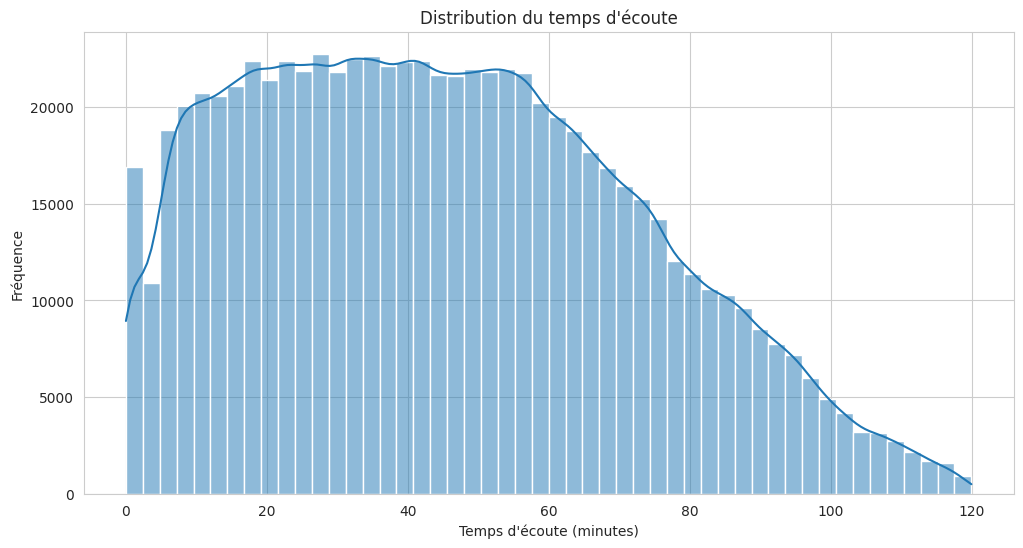

Statistiques du temps d'écoute:
count    750000.000000
mean         45.437406
std          27.138306
min           0.000000
25%          23.178350
50%          43.379460
75%          64.811580
max         119.970000
Name: Listening_Time_minutes, dtype: float64


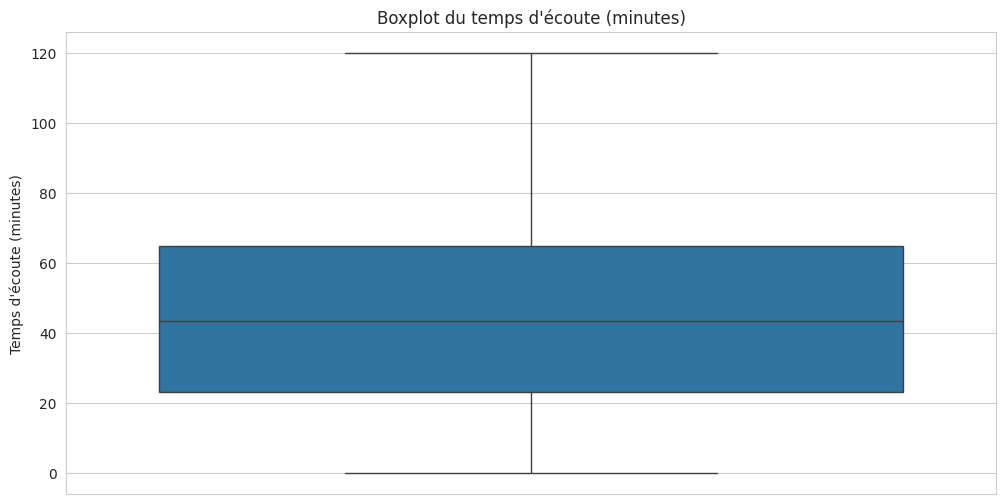

In [22]:
target_column = 'Listening_Time_minutes'

plt.figure(figsize=(12, 6))
sns.histplot(train_df[target_column], kde=True, bins=50)
plt.title('Distribution du temps d\'écoute')
plt.xlabel('Temps d\'écoute (minutes)')
plt.ylabel('Fréquence')
plt.show()

# Statistiques de la variable cible
print(f"Statistiques du temps d'écoute:")
print(train_df[target_column].describe())

# Vérifier s'il y a des valeurs aberrantes dans le temps d'écoute
plt.figure(figsize=(12, 6))
sns.boxplot(y=train_df[target_column])
plt.title('Boxplot du temps d\'écoute (minutes)')
plt.ylabel('Temps d\'écoute (minutes)')
plt.show()

## 6. Relation entre la durée de l'épisode et le temps d'écoute

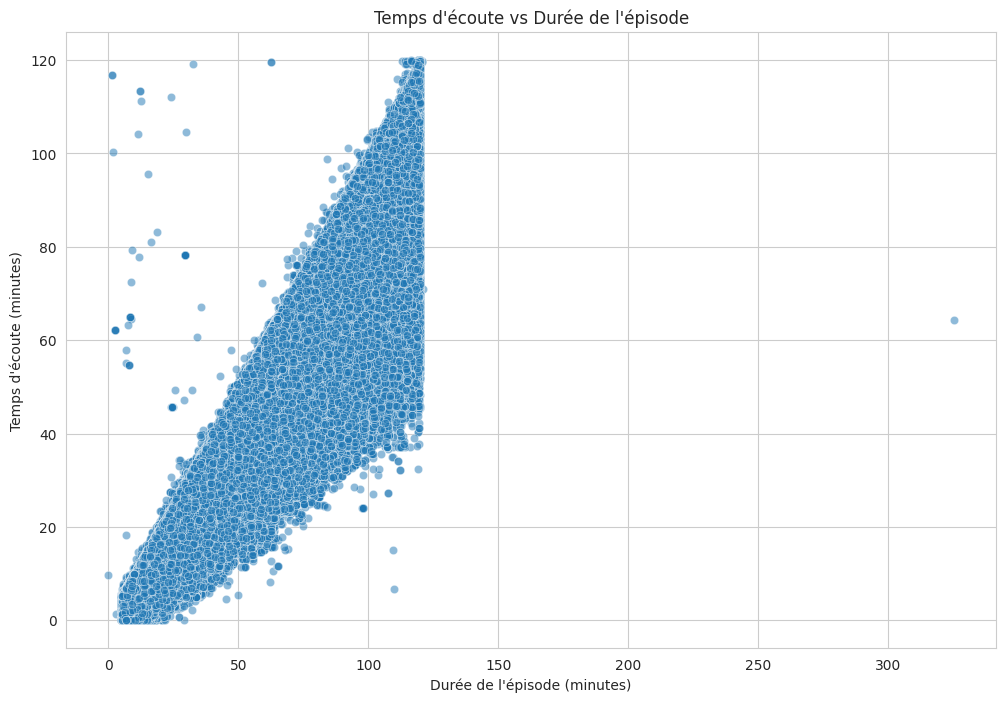

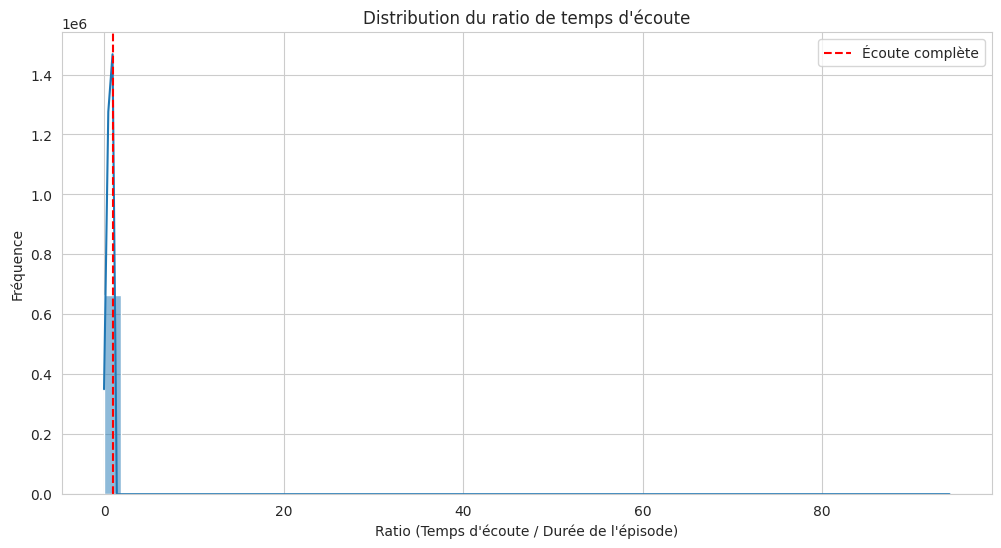

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Episode_Length_minutes', y=target_column, data=train_df, alpha=0.5)
plt.title('Temps d\'écoute vs Durée de l\'épisode')
plt.xlabel('Durée de l\'épisode (minutes)')
plt.ylabel('Temps d\'écoute (minutes)')
plt.show()

# Calculer le ratio de temps d'écoute par rapport à la durée de l'épisode
train_df['Listening_Ratio'] = train_df[target_column] / train_df['Episode_Length_minutes']

# Visualiser la distribution du ratio d'écoute
plt.figure(figsize=(12, 6))
sns.histplot(train_df['Listening_Ratio'].dropna(), kde=True, bins=50)
plt.title('Distribution du ratio de temps d\'écoute')
plt.xlabel('Ratio (Temps d\'écoute / Durée de l\'épisode)')
plt.ylabel('Fréquence')
plt.axvline(x=1, color='r', linestyle='--', label='Écoute complète')
plt.legend()
plt.show()

## 7. Analyse des carateristique numerique

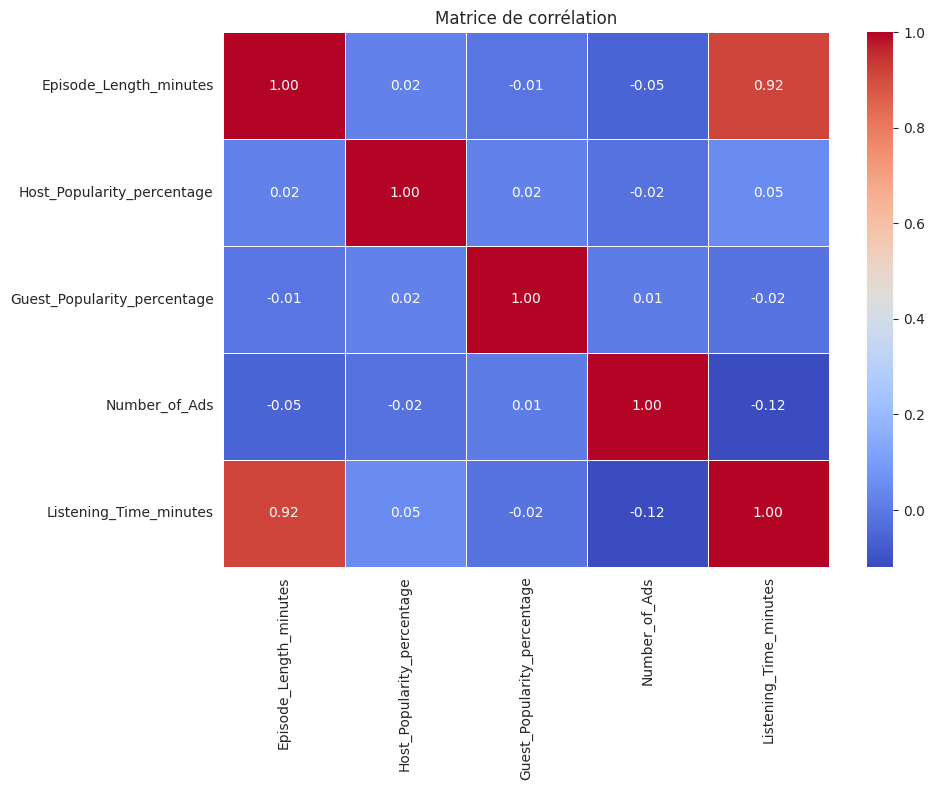

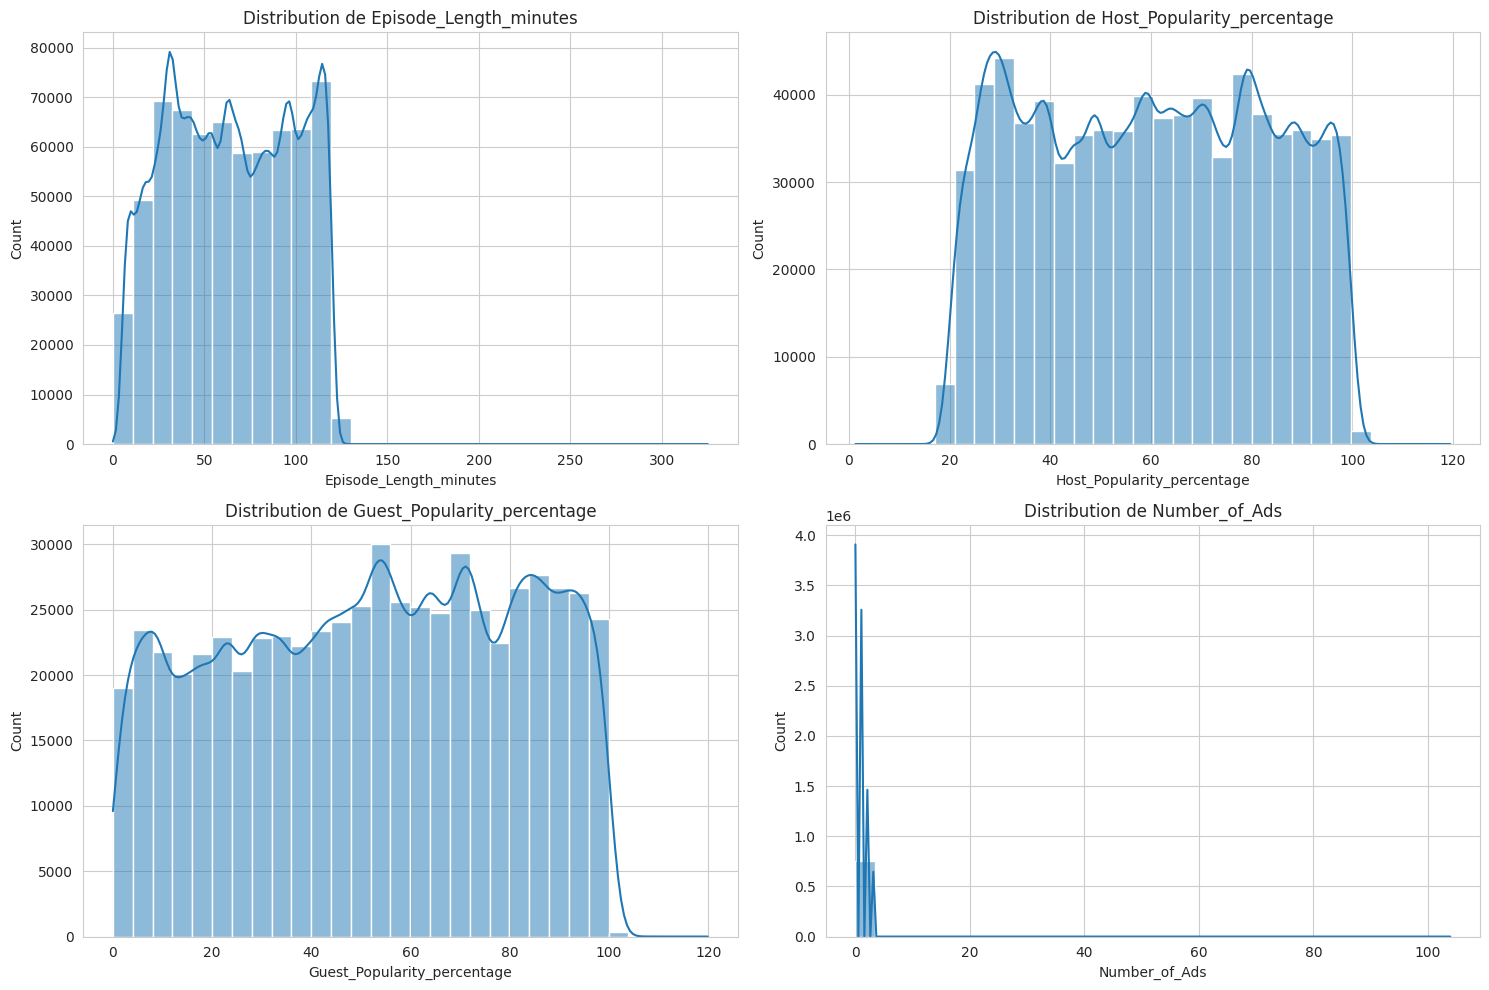

In [24]:
# Sélectionner les colonnes numériques (à l'exception de la cible et l'ID)
numeric_columns = ['Episode_Length_minutes', 'Host_Popularity_percentage', 
                   'Guest_Popularity_percentage', 'Number_of_Ads']

# Matrice de corrélation
correlation_matrix = train_df[numeric_columns + [target_column]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.show()

# Distribution des caractéristiques numériques
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(train_df[column].dropna(), kde=True, bins=30)
    plt.title(f'Distribution de {column}')
plt.tight_layout()
plt.show()

## 8. Analyse des caractéristiques catégorielles

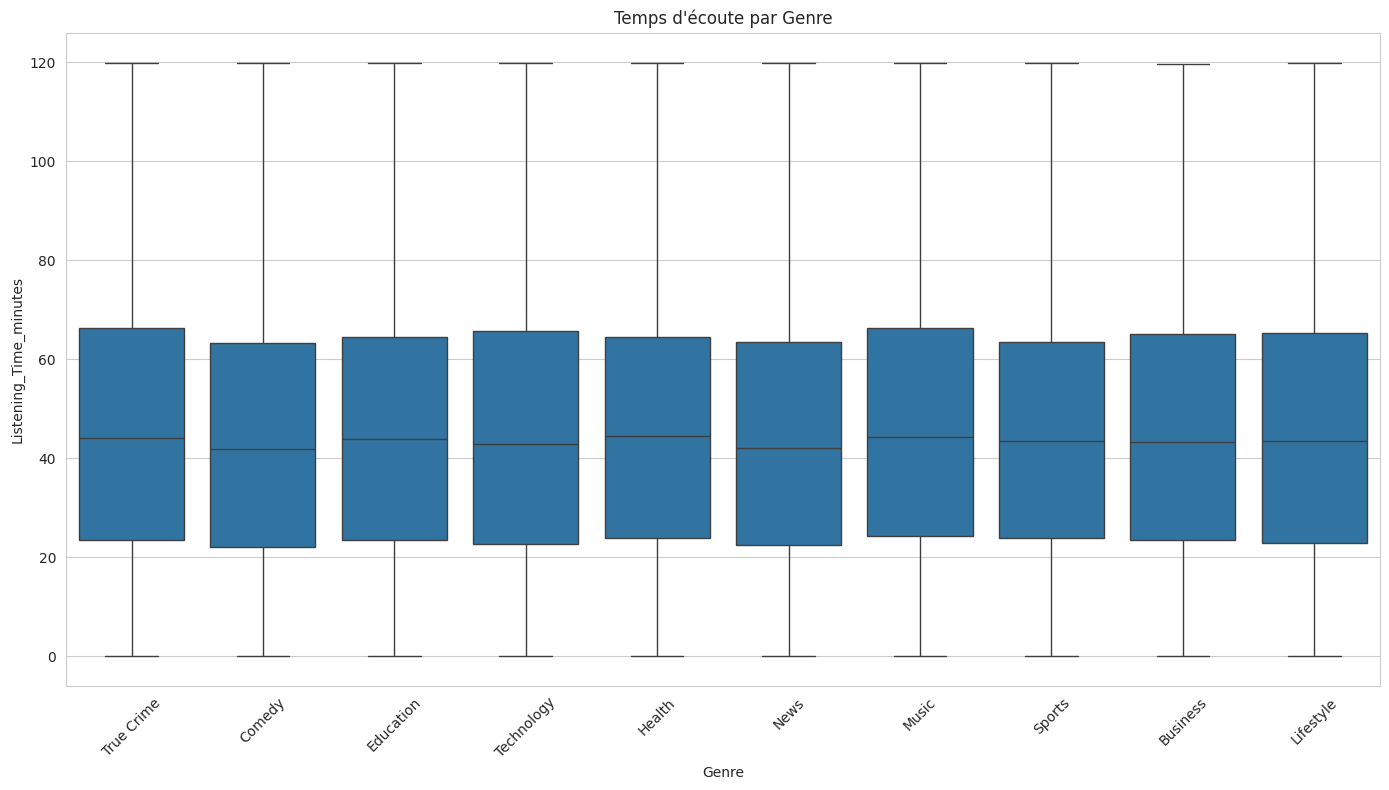


Statistiques de temps d'écoute par Genre:
              count       mean        std  min        25%        50%  \
Genre                                                                  
Business    80521.0  45.538151  27.016292  0.0  23.531360  43.303140   
Comedy      81453.0  44.426441  26.935076  0.0  22.113070  41.945080   
Education   49100.0  45.736640  27.432706  0.0  23.389950  43.942355   
Health      71416.0  45.741413  27.124952  0.0  23.866575  44.510890   
Lifestyle   82461.0  45.523117  27.172606  0.0  22.815210  43.533900   
Music       62743.0  46.578394  27.475405  0.0  24.210000  44.220000   
News        63385.0  44.406144  26.808621  0.0  22.468140  42.003820   
Sports      87606.0  44.935722  26.117835  0.0  23.797760  43.467305   
Technology  86256.0  45.634749  27.904583  0.0  22.599310  42.899730   
True Crime  85059.0  46.042507  27.426368  0.0  23.437215  44.060490   

                 75%     max  
Genre                         
Business    65.19477  119.66  

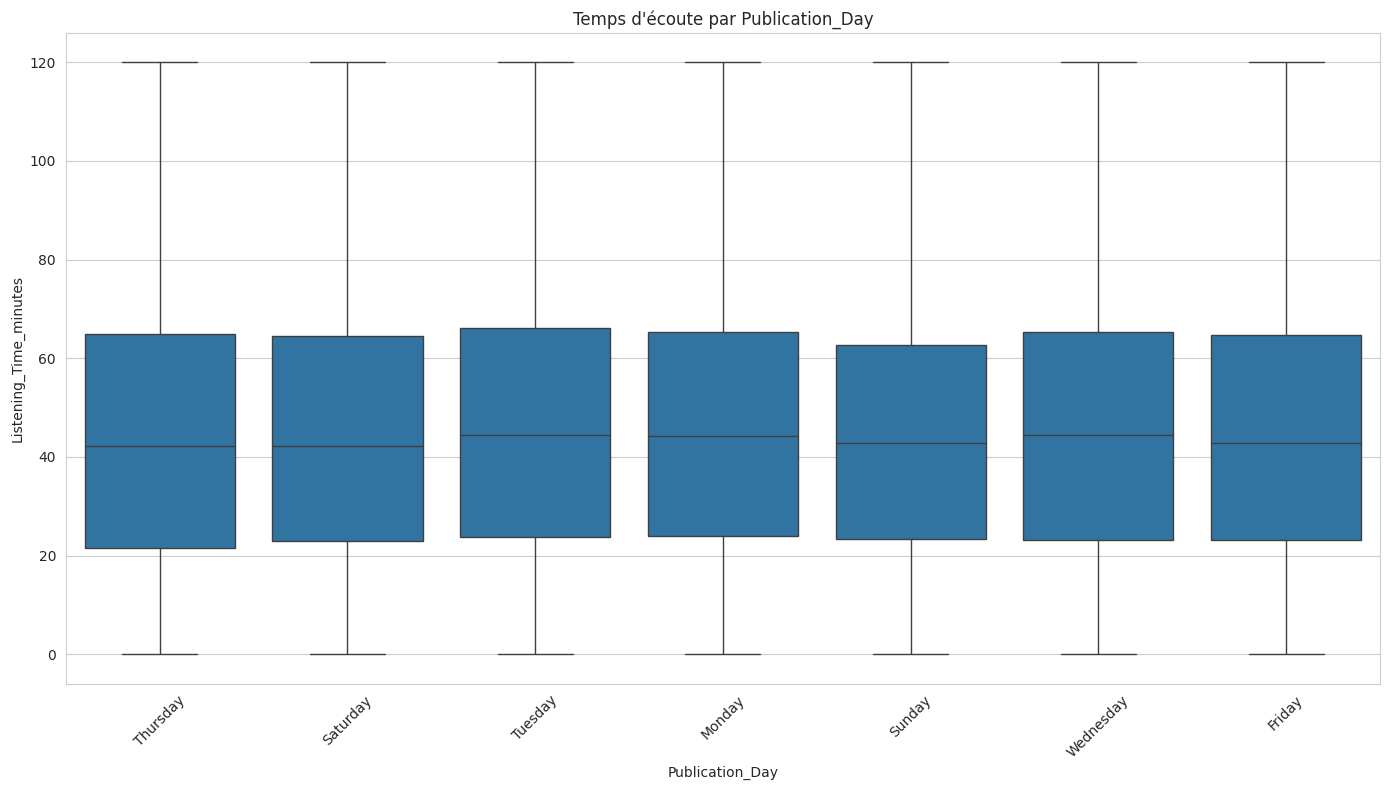


Statistiques de temps d'écoute par Publication_Day:
                    count       mean        std  min       25%        50%  \
Publication_Day                                                             
Friday           108237.0  45.206591  27.202850  0.0  23.15120  42.894310   
Monday           111963.0  45.969630  26.631182  0.0  24.01807  44.229340   
Saturday         103505.0  45.326775  27.355689  0.0  23.04366  42.257780   
Sunday           115946.0  44.817398  26.790059  0.0  23.27490  42.841590   
Thursday         104360.0  44.869706  27.823074  0.0  21.62354  42.231935   
Tuesday           98103.0  46.131411  27.150113  0.0  23.81084  44.410630   
Wednesday        107886.0  45.807177  27.045870  0.0  23.04625  44.505370   

                       75%     max  
Publication_Day                     
Friday           64.763040  119.97  
Monday           65.351220  119.97  
Saturday         64.603750  119.97  
Sunday           62.714440  119.97  
Thursday         64.821700  119

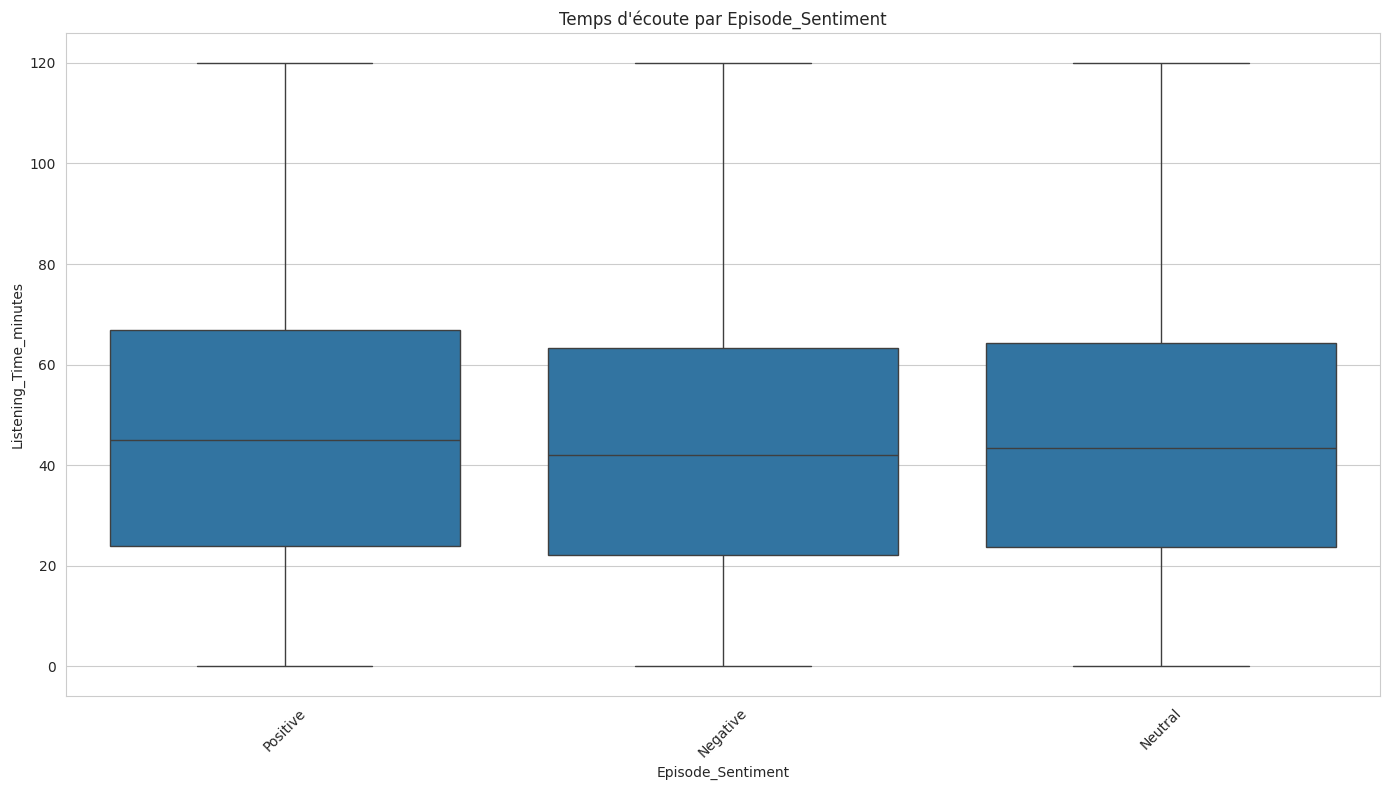


Statistiques de temps d'écoute par Episode_Sentiment:
                      count       mean        std  min        25%       50%  \
Episode_Sentiment                                                             
Negative           250116.0  44.096838  26.920785  0.0  22.046835  42.00041   
Neutral            251291.0  45.499110  26.694379  0.0  23.729820  43.46847   
Positive           248593.0  46.723815  27.731117  0.0  23.872320  44.92842   

                        75%     max  
Episode_Sentiment                    
Negative           63.29225  119.97  
Neutral            64.22313  119.97  
Positive           66.81387  119.97  


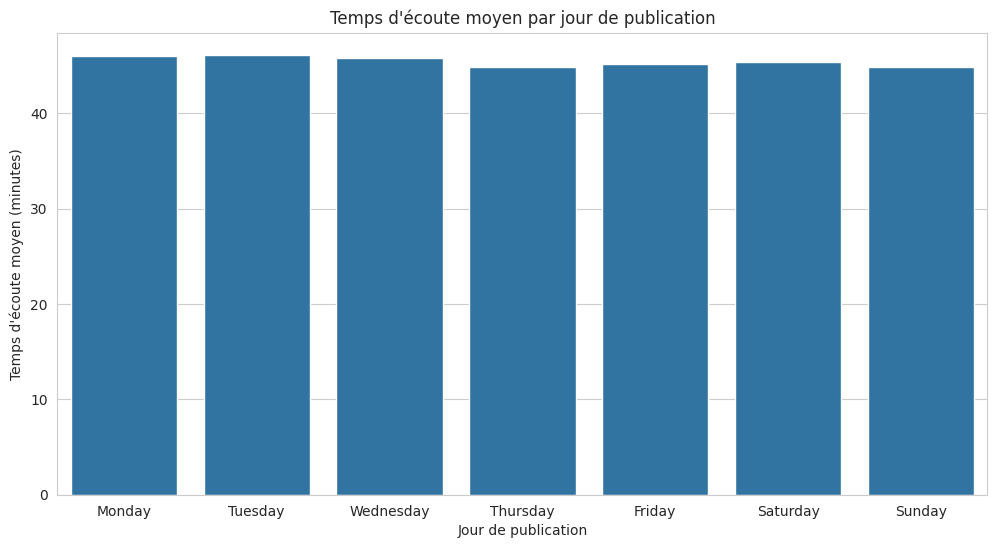

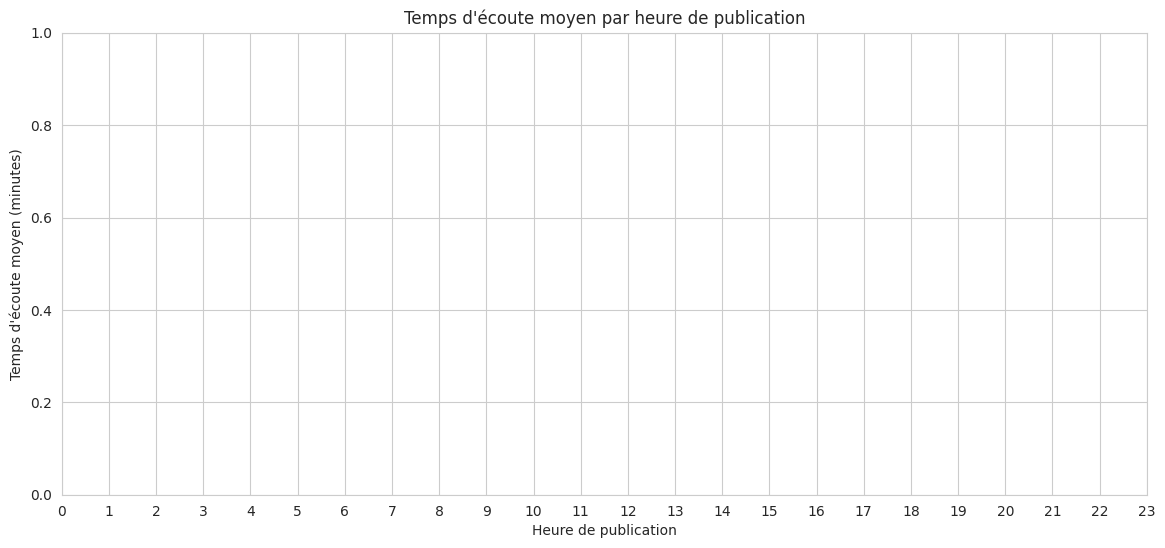

In [25]:
# Sélectionner les colonnes catégorielles
categorical_columns = ['Genre', 'Publication_Day', 'Episode_Sentiment']

# Visualiser la relation entre les variables catégorielles et la cible
for column in categorical_columns:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x=column, y=target_column, data=train_df)
    plt.title(f'Temps d\'écoute par {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Afficher les statistiques par catégorie
    print(f"\nStatistiques de temps d'écoute par {column}:")
    print(train_df.groupby(column)[target_column].describe())

# Analyse du jour de publication
plt.figure(figsize=(12, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_listening_by_day = train_df.groupby('Publication_Day')[target_column].mean().reindex(day_order)
sns.barplot(x=avg_listening_by_day.index, y=avg_listening_by_day.values)
plt.title('Temps d\'écoute moyen par jour de publication')
plt.xlabel('Jour de publication')
plt.ylabel('Temps d\'écoute moyen (minutes)')
plt.show()

# Analyse de l'heure de publication
if 'Publication_Time' in train_df.columns:
    # Extraire l'heure de publication
    train_df['Publication_Hour'] = train_df['Publication_Time'].apply(
        lambda x: int(x.split(':')[0]) if isinstance(x, str) and ':' in x else np.nan
    )
    
    # Temps d'écoute moyen par heure de publication
    plt.figure(figsize=(14, 6))
    avg_listening_by_hour = train_df.groupby('Publication_Hour')[target_column].mean()
    sns.lineplot(x=avg_listening_by_hour.index, y=avg_listening_by_hour.values, marker='o')
    plt.title('Temps d\'écoute moyen par heure de publication')
    plt.xlabel('Heure de publication')
    plt.ylabel('Temps d\'écoute moyen (minutes)')
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.show()

## 9. Impact de la popularité sur le temps d'écoute

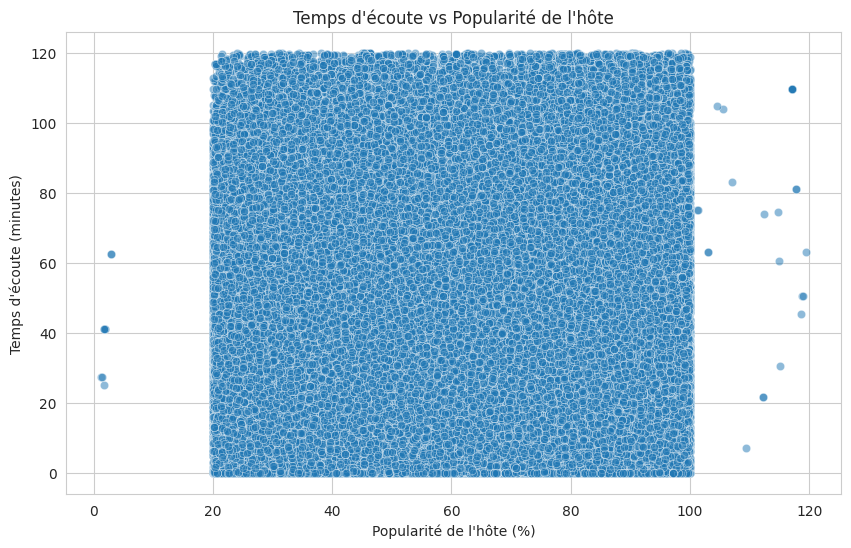

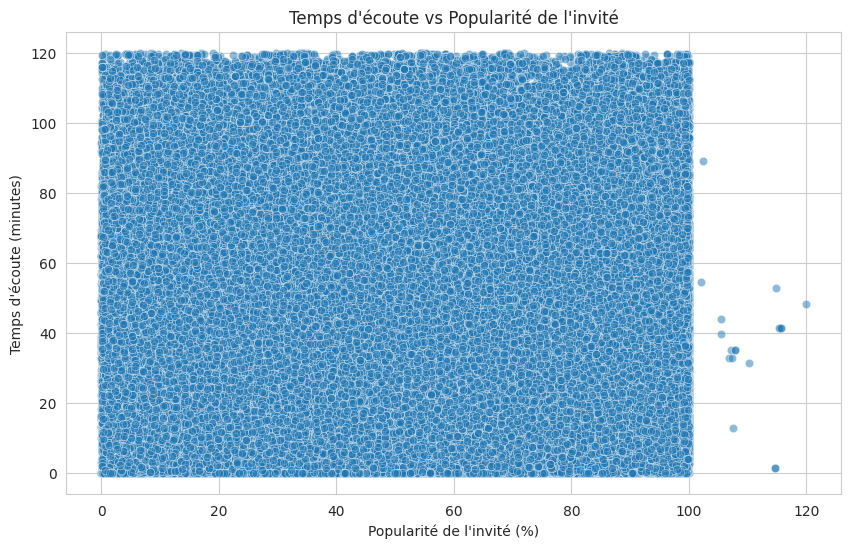

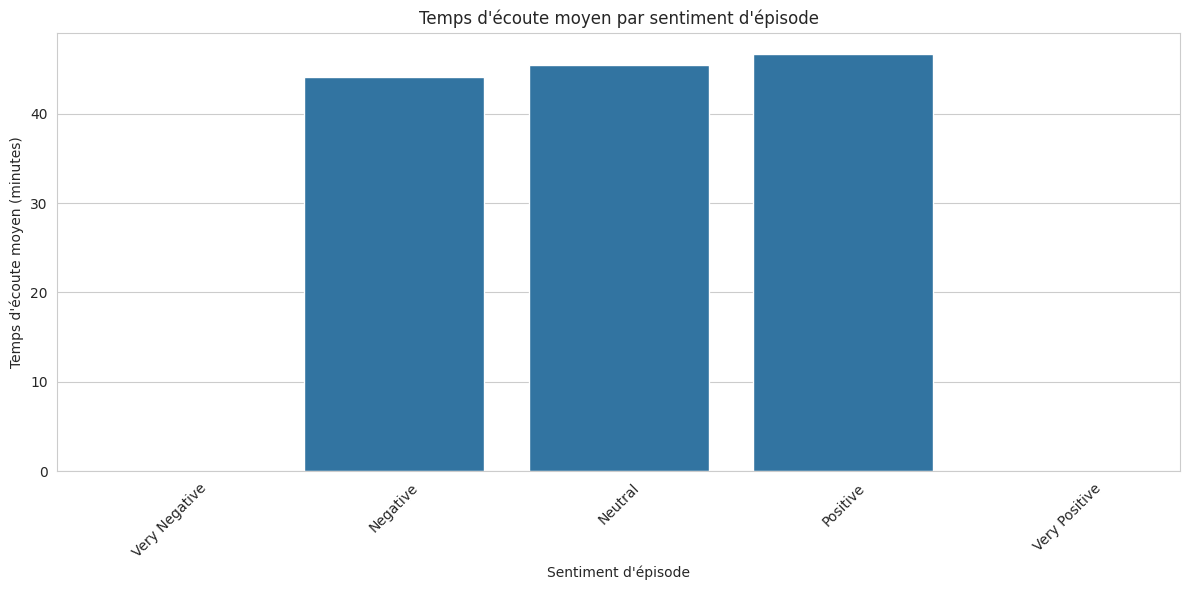

In [26]:
# Relation entre la popularité de l'hôte et le temps d'écoute
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Host_Popularity_percentage', y=target_column, data=train_df, alpha=0.5)
plt.title('Temps d\'écoute vs Popularité de l\'hôte')
plt.xlabel('Popularité de l\'hôte (%)')
plt.ylabel('Temps d\'écoute (minutes)')
plt.show()

# Relation entre la popularité de l'invité et le temps d'écoute
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Guest_Popularity_percentage', y=target_column, data=train_df.dropna(subset=['Guest_Popularity_percentage']), alpha=0.5)
plt.title('Temps d\'écoute vs Popularité de l\'invité')
plt.xlabel('Popularité de l\'invité (%)')
plt.ylabel('Temps d\'écoute (minutes)')
plt.show()

# Temps d'écoute moyen par sentiment d'épisode
plt.figure(figsize=(12, 6))
avg_listening_by_sentiment = train_df.groupby('Episode_Sentiment')[target_column].mean()
sentiment_order = ['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive']
avg_listening_by_sentiment = avg_listening_by_sentiment.reindex(sentiment_order)
sns.barplot(x=avg_listening_by_sentiment.index, y=avg_listening_by_sentiment.values)
plt.title('Temps d\'écoute moyen par sentiment d\'épisode')
plt.xlabel('Sentiment d\'épisode')
plt.ylabel('Temps d\'écoute moyen (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 10. Analyse de l'impact des publicités

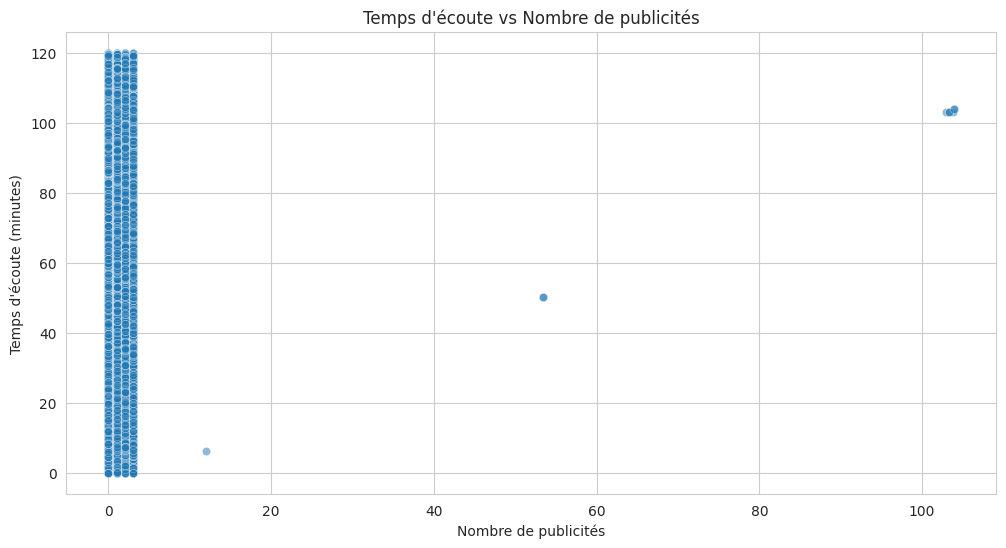

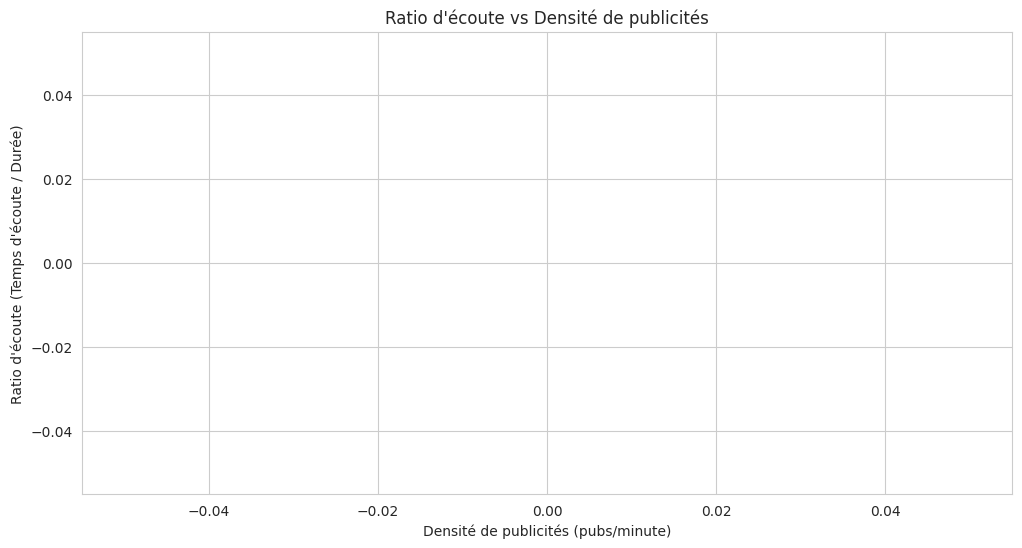

In [27]:
# Relation entre le nombre de publicités et le temps d'écoute
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Number_of_Ads', y=target_column, data=train_df, alpha=0.5)
plt.title('Temps d\'écoute vs Nombre de publicités')
plt.xlabel('Nombre de publicités')
plt.ylabel('Temps d\'écoute (minutes)')
plt.show()

# Créer une variable pour la densité de publicités (pubs par minute)
train_df['Ad_Density'] = train_df['Number_of_Ads'] / train_df['Episode_Length_minutes']

# Relation entre la densité de publicités et le temps d'écoute
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Ad_Density', y='Listening_Ratio', data=train_df.dropna(), alpha=0.5)
plt.title('Ratio d\'écoute vs Densité de publicités')
plt.xlabel('Densité de publicités (pubs/minute)')
plt.ylabel('Ratio d\'écoute (Temps d\'écoute / Durée)')
plt.show()

## 11. Analyse des genres

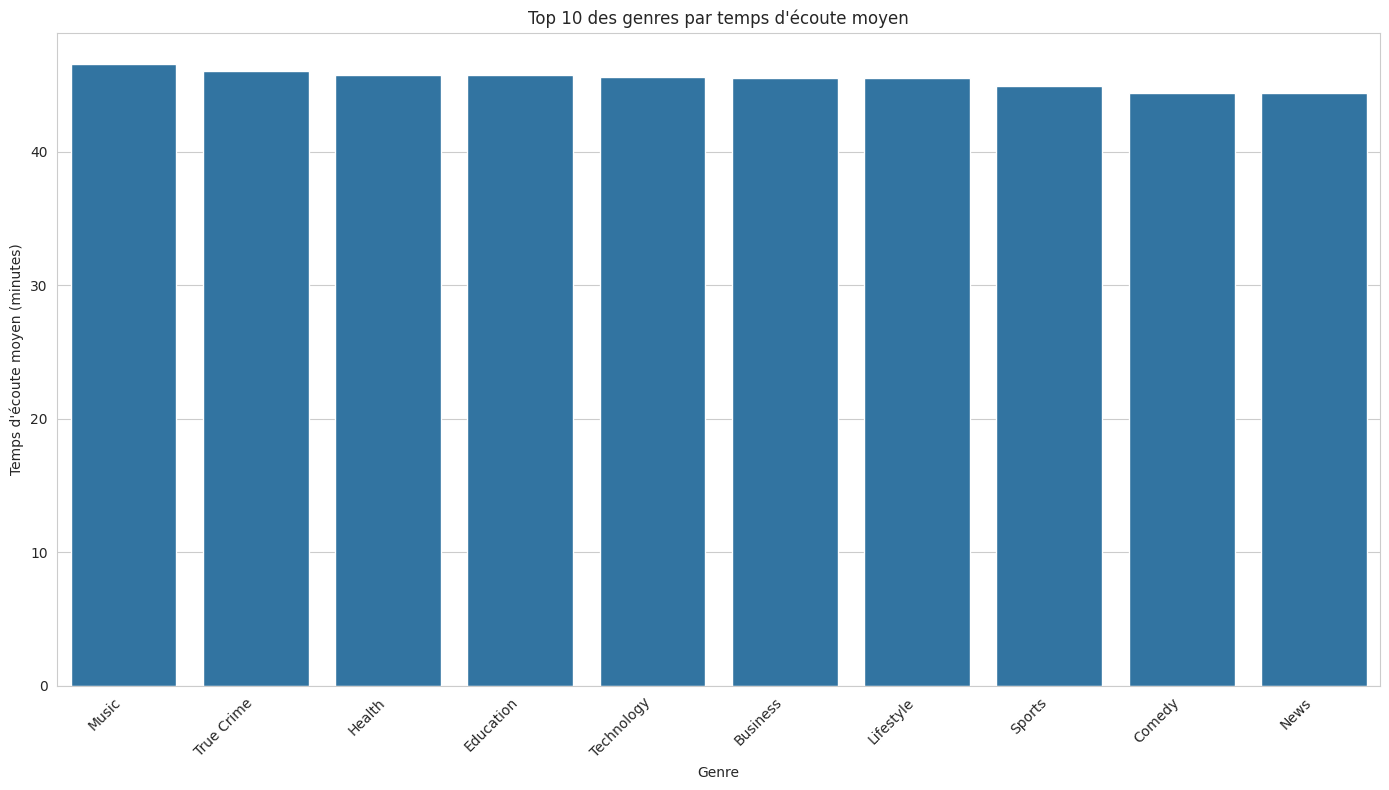

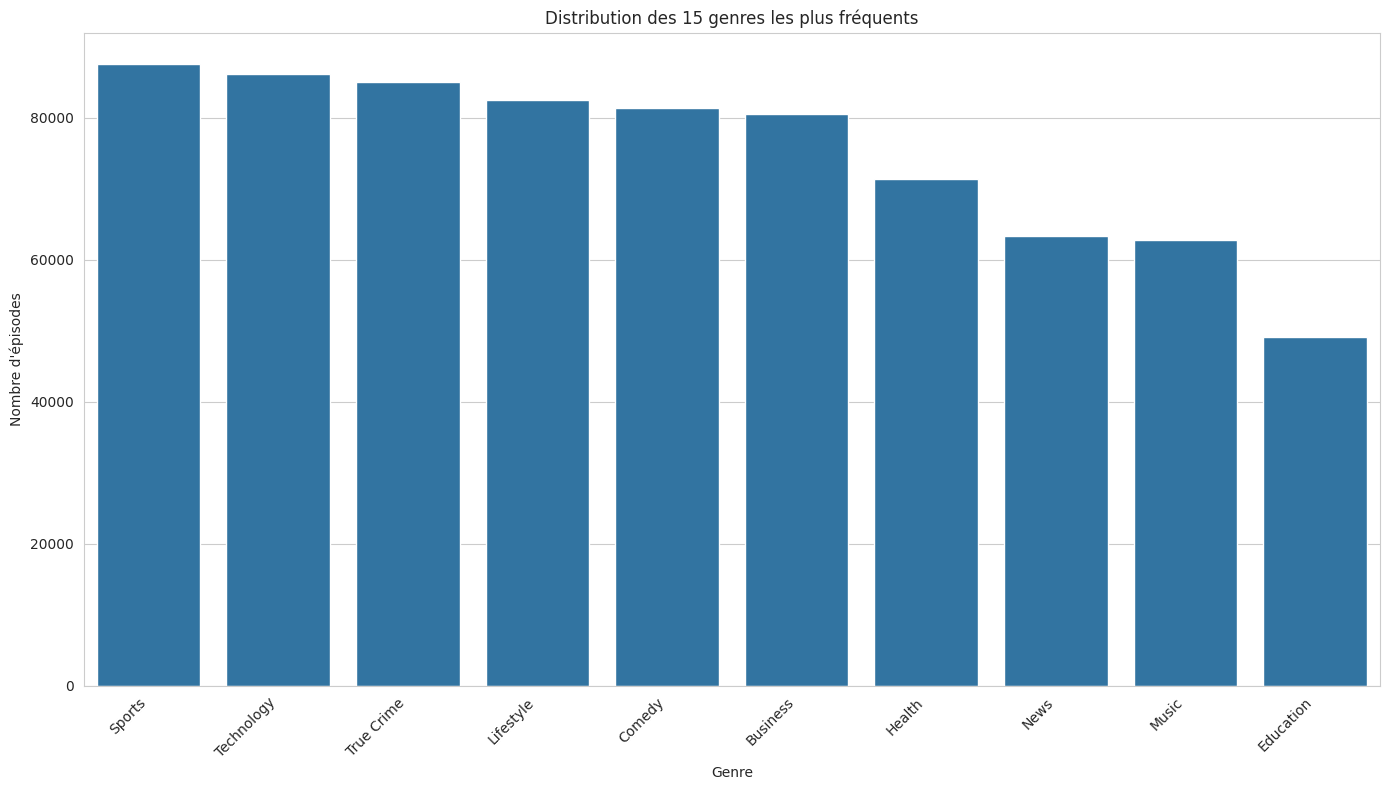

In [28]:
# Top 10 des genres par temps d'écoute moyen
top_genres = train_df.groupby('Genre')[target_column].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 10 des genres par temps d\'écoute moyen')
plt.xlabel('Genre')
plt.ylabel('Temps d\'écoute moyen (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution des genres
plt.figure(figsize=(14, 8))
genre_counts = train_df['Genre'].value_counts().head(15)
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution des 15 genres les plus fréquents')
plt.xlabel('Genre')
plt.ylabel('Nombre d\'épisodes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 12. Ingénierie des caractéristiques et analyse des nouvelles caractéristiques

In [29]:
# Appliquer l'ingénierie des caractéristiques
train_df_enriched = feature_engineering(train_df.copy())

# Afficher les nouvelles caractéristiques créées
print("Nouvelles caractéristiques créées:")
new_columns = [col for col in train_df_enriched.columns if col not in train_df.columns]

Nouvelles caractéristiques créées:


In [31]:
train_df_enriched.isna().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
Listening_Ratio                 87093
Publication_Hour               750000
Ad_Density                      87095
Time_of_Day                    750000
Day_Number                          0
Is_Weekend                          0
Host_Popularity_Category            0
Guest_Popularity_Category      146030
Host_Guest_Popularity_Diff          0
Sentiment_Score                     0
Is_Positive                         0
Title_Length                        0
Has_Clickbait                       0
Combined_Popularity                 0
dtype: int64